In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets

In [4]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [5]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [6]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [7]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [33]:
data_frame.shape

(569, 31)

In [9]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [10]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

In [12]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [17]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [18]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 3s 66ms/step - loss: 0.5917 - accuracy: 0.6968 - val_loss: 0.4061 - val_accuracy: 0.8913
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 0.4250 - accuracy: 0.8191 - val_loss: 0.2944 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 11ms/step - loss: 0.3258 - accuracy: 0.8826 - val_loss: 0.2314 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2657 - accuracy: 0.9095 - val_loss: 0.1924 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2240 - accuracy: 0.9218 - val_loss: 0.1651 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 12ms/step - loss: 0.1931 - accuracy: 0.9315 - val_loss: 0.1451 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 11ms/step - loss: 0.1697 - accuracy: 0.9438 - val_loss: 0.1295 - val_accuracy: 0.9783
Epoch 8/10
13

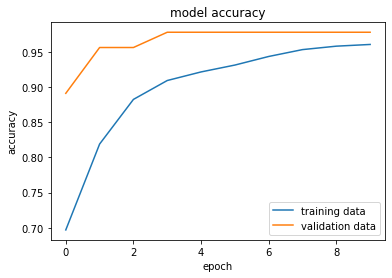

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

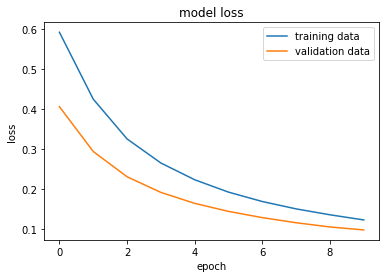

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [25]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1239 - accuracy: 0.9737
0.9736841917037964


In [27]:
Y_pred = model.predict(X_test_std)
Y_pred

4/4 [==============================] - 0s 4ms/step


array([[1.97864786e-01, 3.17798376e-01],
       [3.91009897e-01, 5.39817035e-01],
       [3.23099978e-02, 9.12638426e-01],
       [9.21665490e-01, 2.43618138e-04],
       [4.45623428e-01, 4.89828110e-01],
       [7.84709334e-01, 7.02375127e-03],
       [2.60568768e-01, 5.97012877e-01],
       [4.91653495e-02, 8.11484098e-01],
       [1.07206553e-01, 8.04209173e-01],
       [5.04820459e-02, 6.86613023e-01],
       [5.43041289e-01, 3.93255770e-01],
       [1.10077515e-01, 7.89977789e-01],
       [1.29912645e-01, 4.05088991e-01],
       [2.52358317e-01, 6.72485232e-01],
       [7.76306689e-02, 8.70513558e-01],
       [6.60755455e-01, 4.18686084e-02],
       [3.47945280e-02, 8.56607199e-01],
       [5.98813370e-02, 6.42425239e-01],
       [7.13195577e-02, 8.42386067e-01],
       [8.39939475e-01, 1.94343776e-02],
       [1.43377110e-02, 1.41455308e-01],
       [4.96414900e-02, 7.45324731e-01],
       [4.91838865e-02, 8.76487672e-01],
       [3.24195363e-02, 7.46741116e-01],
       [1.790407

model.predict() gives the prediction probability of each class for that data point

In [28]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [29]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [35]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 63ms/step
[[0.14600512 0.57954746]]
[1]
The tumor is Benign


C:\Users\MadhavaRaj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
